In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/Users/ESUSORK/Desktop/EuropeanSales.csv')

In [3]:
# Columns of dataset
dataset.columns

Index(['Country', 'Population', 'GDPperHead', 'UnemploymentRate',
       'EducationSpending', 'SalesPerCapita', 'ComputerSales'],
      dtype='object')

In [4]:
# Sample of dataset
dataset.head()

,Country,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
0,Austria,8.4,49.60,4.2,5.8,112,941
1,Belgium,10.5,47.09,8.1,5.9,160,1682
2,Bulgaria,7.6,6.55,13.5,3.5,20,154
3,Czech Rep.,10.2,20.67,6.6,4.4,101,1029
4,Denmark,5.5,62.12,5.2,8.4,170,935


In [5]:
# General dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            21 non-null     object 
 1   Population         21 non-null     float64
 2   GDPperHead         21 non-null     float64
 3   UnemploymentRate   21 non-null     float64
 4   EducationSpending  21 non-null     float64
 5   SalesPerCapita     21 non-null     int64  
 6   ComputerSales      21 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.3+ KB


In [6]:
# A brief description of dataset
dataset.describe()

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,26.723810,36.973810,8.100000,5.180952,115.333333,2492.809524
std,26.128929,18.654496,3.122979,1.269889,78.970459,2499.807965
min,4.400000,6.550000,3.600000,3.300000,20.000000,154.000000
25%,8.400000,20.670000,6.300000,4.400000,68.000000,813.000000
50%,10.700000,43.540000,7.300000,5.000000,101.000000,1682.000000
75%,44.800000,51.320000,9.900000,5.800000,151.000000,2879.000000
max,82.500000,64.430000,14.400000,8.400000,372.000000,9887.000000


In [7]:
# Correlation between attributes and target variable
correlation_matrix = dataset.corr()

correlation_matrix 

,Population,GDPperHead,UnemploymentRate,EducationSpending,SalesPerCapita,ComputerSales
Population,1.000000,-0.175236,0.321035,-0.292881,-0.298383,0.807971
GDPperHead,-0.175236,1.000000,-0.502419,0.589111,0.662254,0.151556
UnemploymentRate,0.321035,-0.502419,1.000000,-0.314309,-0.213605,0.171849
EducationSpending,-0.292881,0.589111,-0.314309,1.000000,0.612180,-0.052690
SalesPerCapita,-0.298383,0.662254,-0.213605,0.612180,1.000000,0.081418
ComputerSales,0.807971,0.151556,0.171849,-0.052690,0.081418,1.000000


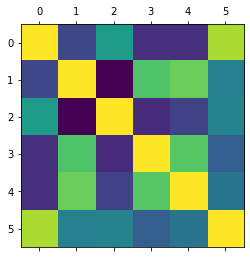

In [8]:
plt.matshow(correlation_matrix)
plt.show()

In [9]:
# As we can see SalesPerCapita have >0.5 correlation with GDPperHead and EducationSpending
# And ComputerSales have 0.808 correlation with Population

In [10]:
# So we should take a closer look on these columns.

<AxesSubplot:xlabel='SalesPerCapita'>

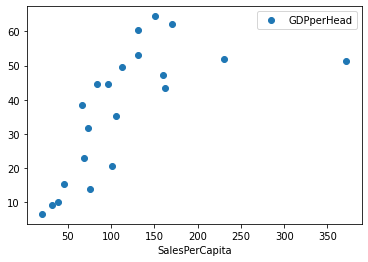

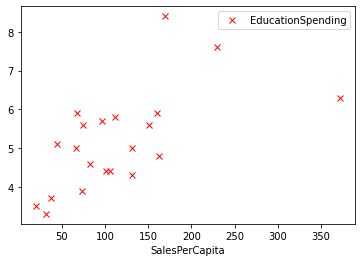

In [11]:
dataset.plot(x='SalesPerCapita', y=['GDPperHead'], style=['o'])
dataset.plot(x='SalesPerCapita', y=['EducationSpending'], style=['rx'])

<AxesSubplot:xlabel='ComputerSales'>

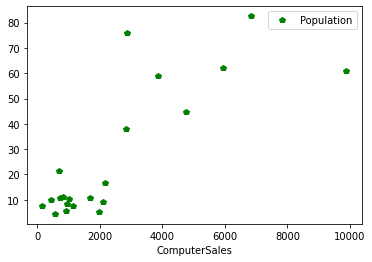

In [12]:
dataset.plot(x='ComputerSales', y=['Population'], style=['gp'])

In [13]:
# As we can see, although there are a few outliers, columns linearly correlated.

In [14]:
# We will cover two models for each case. 
# First one is for just to take the strongest correlation columns.
# Second one is to take all columns.

In [15]:
# Target column is SalesPerCapita.

y = dataset['SalesPerCapita']
X_correlated = dataset.drop(['SalesPerCapita', 'Country', 'Population', 'UnemploymentRate', 'ComputerSales'], axis=1)
X_complete = dataset.drop(['SalesPerCapita', 'Country'], axis=1)

In [16]:
# First case which we just create a model with correlated columns

X_train, X_test, y_train, y_test = train_test_split(X_correlated, y, test_size=0.20, random_state=0)

linear_model_correlated = sm.OLS(y_train, X_train).fit()

linear_model_correlated.summary()

C:\Users\ESUSORK\PycharmProjects\Kripto\venv\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         SalesPerCapita   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              31.86
Date:                Mon, 22 Mar 2021   Prob (F-statistic):                    6.15e-06
Time:                        21:07:37   Log-Likelihood:                         -88.630
No. Observations:                  16   AIC:                                      181.3
Df Residuals:                      14   BIC:                                      182.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GDPperHead            2.0511      1.070      1.917      0.076      -0.244       4.346
EducationSpending     8.5780      8.420      1.019      0.326      -9.481      26.637
==============================================================================
Omnibus:                       30.945   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.733
Skew:                           2.736   Prob(JB):                     9.63e-12
Kurtosis:                       9.794   Cond. No.                         22.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
y_pred_correlated = linear_model_correlated.predict(X_test)

rmse_correlated = np.sqrt(((y_pred_correlated - y_test) ** 2).mean())

print('rmse_correlated_for_sales_per_capita: ' + str(rmse_correlated))

rmse_correlated_for_sales_per_capita: 31.378954214128054


In [18]:
# Second case which we just create a model with all columns

X_train, X_test, y_train, y_test = train_test_split(X_complete, y, test_size=0.20, random_state=0)

linear_model_complete = sm.OLS(y_train, X_train).fit()

linear_model_complete.summary()

C:\Users\ESUSORK\PycharmProjects\Kripto\venv\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         SalesPerCapita   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.794
Method:                 Least Squares   F-statistic:                              13.31
Date:                Mon, 22 Mar 2021   Prob (F-statistic):                    0.000235
Time:                        21:07:38   Log-Likelihood:                         -86.719
No. Observations:                  16   AIC:                                      183.4
Df Residuals:                      11   BIC:                                      187.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Population           -2.2868      1.450     -1.577      0.143      -5.478       0.904
GDPperHead            1.4561      1.369      1.063      0.310      -1.558       4.470
UnemploymentRate      2.8256      5.225      0.541      0.599      -8.675      14.326
EducationSpending    10.1696     12.667      0.803      0.439     -17.709      38.049
ComputerSales         0.0214      0.021      1.039      0.321      -0.024       0.067
==============================================================================
Omnibus:                       22.090   Durbin-Watson:                   2.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.222
Skew:                           2.173   Prob(JB):                     5.50e-06
Kurtosis:                       7.176   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
y_pred_complete = linear_model_complete.predict(X_test)

rmse_complete = np.sqrt(((y_pred_complete - y_test) ** 2).mean())

print('rmse_complete_for_sales_per_capita: ' + str(rmse_complete))

rmse_complete_for_sales_per_capita: 25.083347694023146


In [20]:
# Target column is ComputerSales.

y = dataset['ComputerSales']
X_correlated = dataset.drop(['SalesPerCapita', 'Country', 'GDPperHead', 'UnemploymentRate', 'EducationSpending', 'ComputerSales'], axis=1)
X_complete = dataset.drop(['ComputerSales', 'Country'], axis=1)

In [21]:
# First case which we just create a model with correlated columns

X_train, X_test, y_train, y_test = train_test_split(X_correlated, y, test_size=0.20, random_state=0)

linear_model_correlated = sm.OLS(y_train, X_train).fit()

linear_model_correlated.summary()

C:\Users\ESUSORK\PycharmProjects\Kripto\venv\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ComputerSales   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              87.84
Date:                Mon, 22 Mar 2021   Prob (F-statistic):                    1.16e-07
Time:                        21:07:41   Log-Likelihood:                         -134.66
No. Observations:                  16   AIC:                                      271.3
Df Residuals:                      15   BIC:                                      272.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population    75.2788      8.032      9.372      0.000      58.159      92.398
==============================================================================
Omnibus:                       11.705   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                8.294
Skew:                          -1.390   Prob(JB):                       0.0158
Kurtosis:                       5.171   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred_correlated = linear_model_correlated.predict(X_test)

rmse_correlated = np.sqrt(((y_pred_correlated - y_test) ** 2).mean())

print('rmse_correlated_for_computer_sales: ' + str(rmse_correlated))

rmse_correlated_for_computer_sales: 2415.145720056711


In [23]:
# Second case which we just create a model with all columns

X_train, X_test, y_train, y_test = train_test_split(X_complete, y, test_size=0.20, random_state=0)

linear_model_complete = sm.OLS(y_train, X_train).fit()

linear_model_complete.summary()

C:\Users\ESUSORK\PycharmProjects\Kripto\venv\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ComputerSales   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              28.91
Date:                Mon, 22 Mar 2021   Prob (F-statistic):                    5.64e-06
Time:                        21:07:43   Log-Likelihood:                         -128.87
No. Observations:                  16   AIC:                                      267.7
Df Residuals:                      11   BIC:                                      271.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Population           65.3191     10.608      6.158      0.000      41.972      88.666
GDPperHead           27.7346     18.211      1.523      0.156     -12.348      67.818
UnemploymentRate     39.5751     72.802      0.544      0.598    -120.662     199.812
EducationSpending  -238.0913    166.813     -1.427      0.181    -605.244     129.061
SalesPerCapita        4.1640      4.010      1.039      0.321      -4.661      12.989
==============================================================================
Omnibus:                        3.124   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                1.321
Skew:                          -0.659   Prob(JB):                        0.516
Kurtosis:                       3.497   Cond. No.                         114.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
y_pred_complete = linear_model_complete.predict(X_test)

rmse_complete = np.sqrt(((y_pred_complete - y_test) ** 2).mean())

print('rmse_correlated_for_computer_sales: ' + str(rmse_complete))

rmse_correlated_for_computer_sales: 2239.5572909880893


In [25]:
# As result, again complete result still has lower error, but results are very similar.